# Parkinson Classification with ds004584

Parkinson classification using brain functional connectivity computed on the alpha frequency band and resting-state MEG signals from the ds004584 dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from get_data_ds import get_data_ds
from select_features import select_features
from get_features import get_features_name
from model_classif import classif

'''
frequency_bands = {
    "delta": (0.3, 4),
    "theta": (4.0, 8.0),
    "alpha": (8.0, 12.0),
    "beta": (12.0, 30.0),
    "gamma": (30.0, 60.0)
}
'''
frequency_bands = {"alpha": (8.0, 12.0)}

We load the data and compute the connectivity for each subject and get the class.

In [2]:
X, y, subjects, sensors = get_data_ds(frequency_bands)

63
['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'AF7', 'AF3', 'AFz', 'F1', 'F5', 'FT7', 'FC3', 'C1', 'C5', 'TP7', 'CP3', 'P1', 'P5', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'P6', 'P2', 'CPz', 'CP4', 'TP8', 'C6', 'C2', 'FC4', 'FT8', 'F6', 'AF8', 'AF4', 'F2', 'FCz']
63
<Info | 13 non-empty values
 bads: []
 ch_names: Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, TP9, CP5, CP1, P3, P7, ...
 chs: 63 EEG
 custom_ref_applied: False
 dig: 66 items (3 Cardinal, 63 EEG)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 line_freq: 60.0
 lowpass: 49.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 63
 projs: Average EEG reference: on
 sfreq: 200.0 Hz
 subject_info: 1 item (dict)
>
<EpochsFIF |  27 events (all good), 0 – 9.995 s, baseline off, ~26.0 MB, data loaded,
 'rest': 27>
<CrossSpectralDensity | n_channels=63, time=0.0 to 9.995000000000001

In [3]:
X

,alpha
0,"[[1.3646661814149602e-07, 2.1693715741552847e-..."


In [4]:
X.loc[0,'alpha']

array([[1.36466618e-07, 2.16937157e-07, 6.26305572e-07, ...,
        5.92608831e-08, 3.47587708e-08, 8.88715718e-07],
       [2.49803531e-07, 2.52963163e-07, 6.49216620e-07, ...,
        7.01918869e-08, 3.29457383e-07, 6.89732821e-07],
       [5.12196838e-07, 7.94223656e-07, 4.43102581e-07, ...,
        1.96764791e-07, 6.24664700e-07, 8.18274589e-07],
       ...,
       [1.85951075e-06, 1.80057034e-06, 7.09914081e-06, ...,
        1.81113030e-06, 2.27377752e-06, 3.68487935e-06],
       [3.70700727e-06, 4.26543726e-06, 4.06120041e-06, ...,
        1.76875442e-06, 3.26907411e-06, 5.38785933e-06],
       [8.06771770e-07, 1.64539921e-06, 1.63433567e-06, ...,
        3.03896077e-07, 1.04908055e-06, 3.20584490e-06]])

There are 149 subjects and 1953 features (63 sensors, we keep the lower triangle without the diagonal : 63 * 62 / 2)

In [5]:
X.loc[0,'alpha'].shape

(119, 1953)

Visualisation of the connectivity of the 5 first subjects.

PD


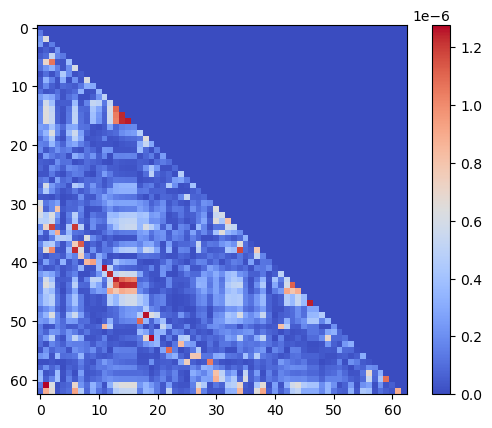

PD


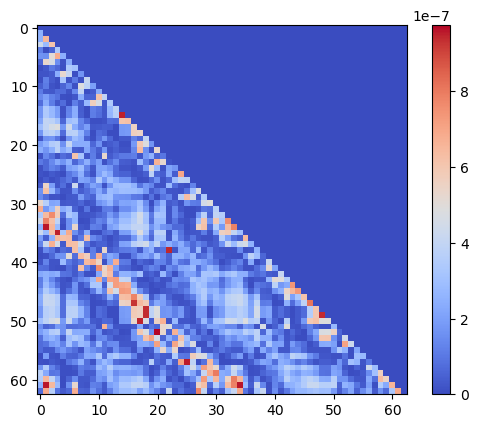

PD


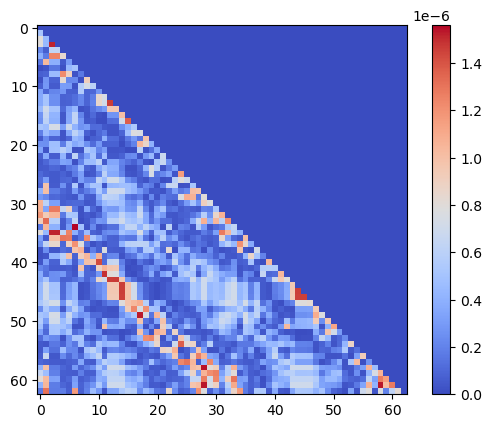

PD


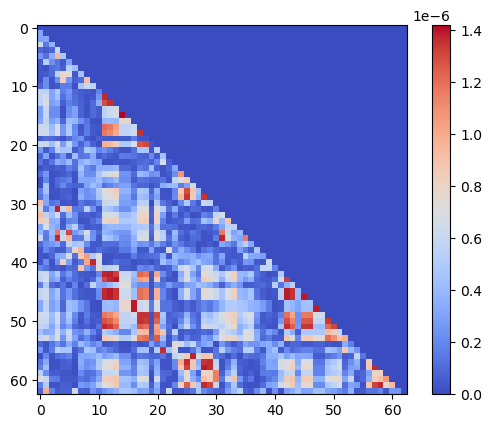

PD


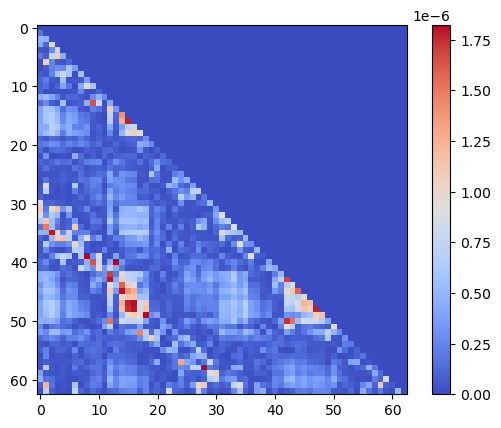

PD


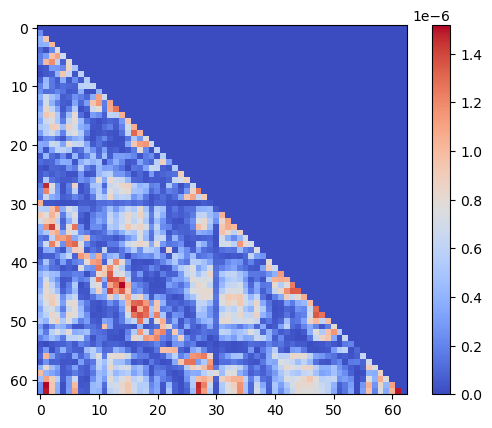

In [6]:
for i, data in enumerate(X.loc[0, 'alpha']):
    a = np.zeros((63,63))
    indices = np.tril_indices(63, -1)
    a[indices] = data
    print(y[i])
    plt.imshow(a, cmap = 'coolwarm')
    plt.colorbar()
    plt.show()
    if i == 5:
        break

Feature selection with Neighborhood Component Analysis (NCA).

In [ ]:
features = select_features(X, y, frequency_bands)

In [ ]:
features 

Selected features.

In [ ]:
names = get_features_name(features, sensors, frequency_bands)
names

Scores computed with a Leave-One-Out cross validation.

In [ ]:
scores = classif(X, y, features, frequency_bands)
scores